# 1) Importing the basic necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
# Importing Dataset
data_raw = pd.read_csv('players_20.csv')
pd.set_option('display.max_columns', None)
data_raw

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3
2,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Junior,27,1992-02-05,175,68,Brazil,Paris Saint-Germain,92,92,105500000,290000,"LW, CAM",Right,5,5,5,High/Medium,Neymar,Yes,195200000.0,"#Speedster, #Dribbler, #Playmaker , #Crosser,...",CAM,10.0,NaN,2017-08-03,2022.0,LW,10.0,91.0,85.0,87.0,95.0,32.0,58.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Injury Free, Selfish, Early C...",87,87,62,87,87,96,88,87,81,95,94,89,96,92,84,80,61,81,49,84,51,36,87,90,90,94,27,26,29,9,9,15,15,11,84+3,84+3,84+3,90+3,89+3,89+3,89+3,90+3,90+3,90+3,90+3,89+3,82+3,82+3,82+3,89+3,66+3,61+3,61+3,61+3,66+3,61+3,46+3,46+3,46+3,61+3
3,200389,https://sofifa.com/player/200389/jan-oblak/20/...,J. Oblak,Jan Oblak,26,1993-01-07,188,87,Slovenia,Atlético Madrid,91,93,77500000,125000,GK,Right,3,3,1,Medium/Medium,Normal,Yes,164700000.0,NaN,GK,13.0,NaN,2014-07-16,2023.0,GK,1.0,NaN,NaN,NaN,NaN,NaN,NaN,87.0,92.0,78.0,89.0,52.0,90.0,"Flair, Acrobatic Clearance",13,11,15,43,13,12,13,14,40,30,43,60,67,88,49,59,78,41,78,12,34,19,11,65,11,68,27,12,18,87,92,78,90,89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,183277,https://sofifa.com/player/183277/eden-hazard/2...,E. Hazard,Eden Hazard,28,1991-01-07,175,74,Belgium,Real Madrid,91,91,90000000,470000,"LW, CF",Right,4,4,4,High/Medium,Normal,Yes,184500000.0,"#Speedster, #Dribbler, #Acrobat",LW,7.0,NaN,2019-07-01,

# 2) Basic Checks and Data Cleaning

In [7]:
# Checking that how many rows and columns are present in the data
data_raw.shape

(18278, 104)

#### There are 18278 rows and 104 columns are present in the dataset.
####

### Identifying which columns contain what information
####

#### 1) "sofifa_id": likely refers to a unique identifier assigned to each player on the SoFIFA website, which can be used to retrieve specific data about them.
#####
#### 2) "player_url": It refers to the URL of each player on the SoFIFA website, which contains the player's stats.
##### 
#### 3) "short_name": It refers to the short names of each player.
#####
#### 4) "long_name": It refers to the full name of each player.
#####
#### 5) "age": It refers to age of each player.
#####
#### 6) "dob": It refers to date of birth of each player.
#####
#### 7) "height_cm": It refers to height of players in cm.
#####
#### 8) "weight_kg": It refers to weight of players in kg.
#####
#### 9) "nationality": It refers to the information about which country each player belongs to.
#####
#### 10) "club": It refers to the information about which club each player belongs to.
#####
#### 11) "overall": It refers to the general performance quality and value of the player, representing the key positional skills and international reputation, rated between 1-99.
#####
#### 12) "potential": It refers to the maximum overall rating expected to be reached by a player at the peak of their career, rated between 1-99.
#####
#### 13) "value_eur	": It refers to the player's market value in euros.
#####
#### 14) "wage_eur": It refers to the player's weekly wage in euros, representing the amount the player earns from their club on a weekly basis.
#####
#### 15) "player_positions": It refers to the various positions a player can play on the field, such as forward, midfielder, defender, or goalkeeper.
#####
#### 16) "preferred_foot": It refers to the player's dominant foot, indicating whether they prefer to use their left or right foot.
#####
#### 17) "international_reputation": It refers to the player's international reputation, rated between 1-5, indicating how well-known and respected the player is on the global stage.
#####
#### 18) "weak_foot": It refers to how well a player uses their weak foot (e.g., left for righties), rated between 1 to 5.
#####
#### 19) "skill_moves": It refers to the player's ability to perform skill moves, rated between 1 to 5.
#####
#### 20) "work_rate": It refers to the degree of effort the player puts in terms of attack and defense, rated as low, medium, and high.
#####
#### 21) "body_type: "It refers to the player's physical build, such as lean, average, stocky, or normal.
#####
#### 22) "real_face": It refers to whether the player's face in the game is a real-life likeness.
#####
#### 23) "release_clause_eur": It refers to the amount a club must pay to release the player from their current contract.
#####
#### 24) "player_tags": It refers to specific attributes or characteristics associated with a player, such as 'Dribbler,' 'Speedster,' or 'Playmaker.' These tags highlight the player's unique skills and playing style.
#####
#### 25) "team_position": It refers to the player's position within their team, such as forward, midfielder, defender, or goalkeeper.
#####
#### 26) "team_jersey_number": It refers to the number assigned to a player on their team's jersey.
#####
#### 27) "loaned_from": It refers to the club from which the player is currently on loan.
#####
#### 28) "joined": It refers to the date when the player joined their current club.
#####
#### 29) "contract_valid_until": It refers to the date until which the player's contract with their current club is valid.
#####
#### 30) "nation_position": It refers to the player's position within their national team, such as forward, midfielder, defender, or goalkeeper.
#####
#### 31) "nation_jersey_number": It refers to the number assigned to a player on their national team's jersey.
#####
#### 32) "pace": It refers to the player's speed, including both acceleration and sprint speed.
#####
#### 33) "shooting": It refers to the player's ability to score goals, including their accuracy and power when taking shots.
#####
#### 34) "passing": It refers to the player's ability to accurately pass the ball to teammates, including short and long passes.
#####
#### 35) "dribbling": It refers to the player's ability to control the ball while moving, including their agility and skill in maneuvering past opponents.
#####
#### 36) "defending": It refers to the player's ability to prevent the opposing team from scoring, including skills like tackling, marking, and intercepting the ball.
#####
#### 37) "physic": It refers to the player's physical attributes, such as strength, stamina, and overall physical presence on the field, represented by a numeric value.
#####
#### 38) "gk_diving": It refers to the goalkeeper's ability to dive and make saves, represented by a numeric value.
#####
#### 39) "gk_handling": It refers to the goalkeeper's ability to catch and hold onto the ball.
#####
#### 40) "gk_kicking": It refers to the goalkeeper's ability to kick the ball accurately and with power.
#####
#### 41) "gk_reflexes": "It refers to the goalkeeper's ability to react quickly and make saves.
#####
#### 42) "gk_speed": It refers to the goalkeeper's speed, including both their acceleration and sprint speed.
#####
#### 43) "gk_positioning": It refers to the goalkeeper's ability to position themselves correctly to make saves.
#####
#### 44) "player_traits": It refers to the player's special skills or traits, such as 'Beat Offside Trap,' 'Argues with Officials,' or 'Early Crosser.
#####
#### 45) "attacking_crossing": It refers to the player's ability to deliver accurate crosses from wide areas into the penalty box.
#####
#### 46) "attacking_finishing": It refers to the player's ability to score goals when presented with a chance, focusing on accuracy and composure in front of the goal.
#####
#### 47) "attacking_heading_accuracy": It refers to the player's ability to accurately head the ball towards the goal during attacking plays.
#####
#### 48) "attacking_short_passing": It refers to the player's ability to make accurate short passes to teammates during attacking plays.
#####
#### 49) "attacking_volleys": It refers to the player's ability to strike the ball with power and accuracy while it's in the air, typically during attacking plays.
#####
#### 50) "skill_dribbling": It refers to the player's ability to control the ball while moving, including their agility and skill in maneuvering past opponents.
#####
#### 51) "skill_curve": It refers to the player's ability to bend the ball while shooting, typically used for free-kicks and long-range shots.
#####
#### 52) "skill_fk_accuracy": It refers to the player's ability to accurately take free-kicks, focusing on precision and technique.
#####
#### 53) "skill_long_passing": It refers to the player's ability to make accurate long passes to teammates over greater distances.
#####
#### 54) "skill_ball_control": It refers to the player's ability to control the ball with precision and ease, including their first touch and overall ball-handling skills.
#####
#### 55) "movement_acceleration": It refers to the player's ability to quickly reach their top speed from a standing start.
#####
#### 56) "movement_sprint_speed": It refers to the player's top speed when sprinting.
#####
#### 57) "movement_agility": It refers to the player's ability to change direction quickly and maintain control of the ball while moving.
#####
#### 58) "movement_reactions": It refers to the player's ability to quickly respond to events on the field, such as intercepting passes or reacting to loose balls.
#####
#### 59) "movement_balance": It refers to the player's ability to maintain stability and control while moving, especially when changing direction or under physical pressure.
#### 60) "power_shot_power": It refers to the player's ability to strike the ball with power when taking shots.
#####
#### 61) "power_jumping": It refers to the player's ability to jump high, which is crucial for winning aerial duels and heading the ball.
#####
#### 62) "power_stamina": It refers to the player's ability to maintain high energy levels and perform effectively throughout the entire match.
#####
#### 63) "power_strength": It refers to the player's physical strength, which is crucial for holding off opponents and winning physical battles on the field.
#####
#### 64) "power_long_shots": It refers to the player's ability to take powerful and accurate shots from long distances.
#####
#### 65) "mentality_aggression": It refers to the player's level of aggression and intensity during matches, influencing their willingness to engage in physical battles and challenges.
#####
#### 66) "mentality_interceptions": It refers to the player's ability to anticipate and intercept passes from the opposing team, helping to regain possession for their team.
#####
#### 67) "mentality_positioning": It refers to the player's ability to position themselves effectively on the field, both in attack and defense, to maximize their impact on the game.
#####
#### 68) "mentality_vision": It refers to the player's ability to see and anticipate opportunities on the field, including their awareness of teammates' positions and potential passing options.
#####
#### 69) "mentality_penalties": It refers to the player's ability to take accurate and composed penalty kicks under pressure.
#####
#### 70) "mentality_composure": It refers to the player's ability to remain calm and make effective decisions under pressure, especially in high-stakes situations.
#####
#### 71) "defending_marking": It refers to the player's ability to track and stay close to an opponent, preventing them from receiving the ball or making effective plays.
#####
#### 72) "defending_standing_tackle": It refers to the player's ability to effectively use standing tackles to dispossess opponents and regain control of the ball.
#####
#### 73) "defending_sliding_tackle": It refers to the player's ability to effectively use sliding tackles to dispossess opponents and regain control of the ball.
#####
#### 74) "goalkeeping_diving": It refers to the goalkeeper's ability to dive and make saves, especially when dealing with shots aimed at the corners of the goal.
#####
#### 75) "goalkeeping_handling": It refers to the goalkeeper's ability to catch and hold onto the ball, minimizing the risk of rebounds and loose balls.
#### 76) "goalkeeping_kicking": It refers to the goalkeeper's ability to accurately and powerfully kick the ball, whether it's for clearances, goal kicks, or distributing the ball to teammates.
#####
#### 77) "goalkeeping_positioning": It refers to the goalkeeper's ability to position themselves effectively in the goal to make saves and prevent scoring opportunities.
#####
#### 78) "goalkeeping_reflexes": It refers to the goalkeeper's ability to quickly react and make saves, especially in close-range situations.
#####
#### 79) "ls": The player's general ability when playing in the Left Striker (LS) position, rated between 1-99.
#####
#### 80) "st": It refers to the player's general ability when playing in the Striker (ST) position, rated between 1-99.
#####
#### 81) "rs": It refers to the player's general ability when playing in the Right Striker (RS) position, rated between 1-99.
#####
#### 82) "lw": It refers to the player's general ability when playing in the Left Winger (LW) position, rated between 1-99.
#####
#### 83) "lf": It refers to the player's general ability when playing in the Left Forward (LF) position, rated between 1-99.
#####
#### 84) "cf": It refers to the player's general ability when playing in the Center Forward (CF) position, rated between 1-99.
#####
#### 85) "rf": It refers to the player's general ability when playing in the Right Forward (RF) position, rated between 1-99.
#####
#### 86) "rw": "It refers to the player's general ability when playing in the Right Winger (RW) position, rated between 1-99.
#####
#### 87) "lam": It refers to the player's general ability when playing in the Left Attacking Midfielder (LAM) position, rated between 1-99.
#####
#### 88) "cam": It refers to the player's general ability when playing in the Center Attacking Midfielder (CAM) position, rated between 1-99.
#####
#### 89) "ram": It refers to the player's general ability when playing in the Right Attacking Midfielder (RAM) position, rated between 1-99.
##### 
#### 90) "lm": It refers to the player's general ability when playing in the Left Midfielder (LM) position, rated between 1-99.
#####
#### 91) "lcm": It refers to the player's general ability when playing in the Left Center Midfielder (LCM) position, rated between 1-99.
#####
#### 92) "cm": It refers to the player's general ability when playing in the Center Midfielder (CM) position, rated between 1-99.
#####
#### 93) "rcm": It refers to the player's general ability when playing in the Right Center Midfielder (RCM) position, rated between 1-99.
#####
#### 94) "rm": "It refers to the player's general ability when playing in the Right Midfielder (RM) position, rated between 1-99.
#####
#### 95) "lwb": "It refers to the player's general ability when playing in the Left Wing Back (LWB) position, rated between 1-99.
#####
#### 96) "ldm": It refers to the player's general ability when playing in the Left Defensive Midfielder (LDM) position, rated between 1-99.
#####
#### 97) "cdm": It refers to the player's general ability when playing in the Center Defensive Midfielder (CDM) position, rated between 1-99.
#####
#### 98) "rdm": "It refers to the player's general ability when playing in the Right Defensive Midfielder (RDM) position, rated between 1-99.
#####
#### 99) "rwb": It refers to the player's general ability when playing in the Right Wing Back (RWB) position, rated between 1-99.
#####
#### 100) "lb": It refers to the player's general ability when playing in the Left Back (LB) position, rated between 1-99.
#####
#### 101) "lcb": It refers to the player's general ability when playing in the Left Center Back (LCB) position, rated between 1-99.
#####
#### 102) "cb": "It refers to the player's general ability when playing in the Center Back (CB) position, rated between 1-99.
#####
#### 103) "rcb": It refers to the player's general ability when playing in the Right Center Back (RCB) position, rated between 1-99.
#####
#### 104) "rb": It refers to the player's general ability when playing in the Right Back (RB) position, rated between 1-99.

In [12]:
data_raw.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [14]:
data_raw.head(2)

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,32,1987-06-24,170,72,Argentina,FC Barcelona,94,94,95500000,565000,"RW, CF, ST",Left,5,4,4,Medium/Low,Messi,Yes,195800000.0,"#Dribbler, #Distance Shooter, #Crosser, #FK Sp...",RW,10.0,NaN,2004-07-01,2021.0,NaN,NaN,87.0,92.0,92.0,96.0,39.0,66.0,NaN,NaN,NaN,NaN,NaN,NaN,"Beat Offside Trap, Argues with Officials, Earl...",88,95,70,92,88,97,93,94,92,96,91,84,93,95,95,86,68,75,68,94,48,40,94,94,75,96,33,37,26,6,11,15,14,8,89+2,89+2,89+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,93+2,92+2,87+2,87+2,87+2,92+2,68+2,66+2,66+2,66+2,68+2,63+2,52+2,52+2,52+2,63+2
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,34,1985-02-05,187,83,Portugal,Juventus,93,93,58500000,405000,"ST, LW",Right,5,4,5,High/Low,C. Ronaldo,Yes,96500000.0,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2018-07-10,2022.0,LS,7.0,90.0,93.0,82.0,89.0,35.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,"Long Throw-in, Selfish, Argues with Officials,...",84,94,89,83,87,89,81,76,77,92,89,91,87,96,71,95,95,85,78,93,63,29,95,82,85,95,28,32,24,7,11,15,14,11,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3


In [16]:
data_raw.isnull().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

#### There are too many null values in the dataset, so removing them will cause a significant loss of data.
####

In [19]:
# Checking for NaN values
data_raw.isna().sum()

sofifa_id        0
player_url       0
short_name       0
long_name        0
age              0
              ... 
lb            2036
lcb           2036
cb            2036
rcb           2036
rb            2036
Length: 104, dtype: int64

#### There are too many NaN values present in the dataset.
####

In [25]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(45), object(43)
memory usage: 14.5+ MB


#### There are 61 Numeric and 43 Non-Numeric columns present in the data.
####
#### We have to convert some Non-Numeric columns into Numeric which contains actully numeric information but due to '+' sign the columns are showing data type as object.
####

In [30]:
# List of columns to convert
columns_to_convert = [
    'ls', 'st', 'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 
    'lm', 'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 
    'lb', 'lcb', 'cb', 'rcb', 'rb'
]

# Convert the specified columns
for column in columns_to_convert:
    data_raw[column] = data_raw[column].str.split('+').str[0].fillna(0).astype('int64')
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18278 entries, 0 to 18277
Columns: 104 entries, sofifa_id to rb
dtypes: float64(16), int64(71), object(17)
memory usage: 14.5+ MB


#### We converted the necessary non-numeric columns into numeric columns and also filled the NaN values in these columns with 0. Filling the NaN values with 0 is valid because these columns contain positional skills. For example, if a player is a left striker, the values for that position are maximum, and the player can also play in other positions but not as well as their own position. Therefore, the values for this player in some positions are NaN, meaning that the player cannot play in those positions (e.g., goalkeeper position). For a goalkeeper, the values in other positions are NaN, so replacing those values with zero is valid.
####
#### Another option is to remove those NaN values, but the count is very high, so removing them may cause excessive data loss.
#### 

In [36]:
# Checking for Duplicates
data_raw.duplicated().sum()

0

#### There are no duplicates present in the data.
####

# 2) EDA

## i) Univariate Analysis:

In [43]:
data_raw.describe()

,sofifa_id,age,height_cm,weight_kg,overall,potential,value_eur,wage_eur,international_reputation,weak_foot,skill_moves,release_clause_eur,team_jersey_number,contract_valid_until,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
count,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,1.827800e+04,18278.000000,18278.000000,18278.000000,18278.000000,1.698000e+04,18038.000000,18038.000000,1126.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,16242.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,2036.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000,18278.000000
mean,219738.864482,25.283291,181.362184,75.276343,66.244994,71.546887,2.484038e+06,9456.942773,1.103184,2.944250,2.368038,4.740717e+06,20.103892,2021.114591,12.114565,67.700899,52.298301,57.233777,62.531585,51.553503,64.876678,65.422397,63.146365,61.832515,66.390472,37.798625,63.374754,49.718405,45.590218,52.221468,58.748003,42.809388,55.596509,47.325692,42.708885,52.768848,58.461976,64.299923,64.415746,63.504924,61.752544,63.856439,58.181694,64.928165,62.889485,65.234763,46.812945,55.742149,46.380239,50.072163,53.609749,48.383357,58.528778,46.848889,47.640333,45.606631,16.572765,16.354853,16.212934,16.368038,16.709924,51.397855,51.397855,51.397855,52.504322,52.229237,52.229237,52.229237,52.504322,52.472645,52.472645,52.472645,53.108272,51.755061,51.755061,51.755061,53.108272,51.002900,50.413886,50.413886,50.413886,51.002900,50.359613,49.296203,49.296203,49.296203,50.359613
std,27960.200461,4.656964,6.756961,7.047744,6.949953,6.139669,5.585481e+06,21351.714095,0.378861,0.664656,0.765038,1.103002e+07,16.603639,1.289888,6.735922,11.297656,14.029418,10.407844,10.284950,16.419528,9.760162,7.736278,7.244023,7.510709,8.154062,10.634038,8.447876,18.325403,19.594609,17.428429,14.679653,17.701815,18.929118,18.422991,17.433612,15.246454,16.741878,15.042232,14.847763,14.808380,9.135613,14.201559,13.326083,11.934059,16.017954,12.534811,19.322343,17.318157,20.775812,19.594022,13.955626,15.708099,11.880840,20.091287,21.585641,21.217734,17.738069,16.996925,16.613665,17.136497,18.038125,20.145877,20.145877,20.145877,20.781284,20.684817,20.684817,20.684817,20.781284,20.721317,20.721317,20.721317,20.716599,20.114402,20.114402,20.114402,20.716599,19.964329,20.255338,20.255338,20.255338,19.964329,19.991826,20.685366,20.685366,20.685366,19.991826
min,768.000000,16.000000,156.000000,50.0000

### Interpretation about Skills:
#### Most of the entries are about player skills. They show which player performs better at which position or type, with the highest values indicating the best performance and the lowest values indicating the worst performance—max and min values, respectively.
#####
### Interpretation about weight, height, age:
#### 1) The player with the minimum age is 16 years, while the player with the maximum age is 42 years.
#####
#### 2) The player with the minimum height is 156 cm, while the tallest player is 205 cm.
#####
#### 3) The player with the minimum weight is 50 kg, while the heaviest player is 110 kg.
#####
### Interpretation based on overall, potential and some other features:
#### 1) The player with the minimum overall rating is 48, while the highest-rated player is 94.
#####
#### 2) The player with the minimum potential is 49, while the player with the highest potential is 95.
#####
#### 3) The player with the minimum market value in euros is 0 (i.e., less than a euro), while the highest market value is 105,500,000 euros.
#####
#### 4) The player with the minimum release clause, which represents the amount of money a team must pay to release a player from their contract, in euros is 13,000, while the maximum release clause is 195,800,000 euros.
#####
#### 5) The player with the minimum physical attribute, which represents a player's physical abilities such as strength, endurance, and agility, is 27, while the maximum physical attribute is 90.
#####
### Interpretation based on international reputation, weak foot, and skill moves:
#### The player attributes for international reputation, weak foot, and skill moves are ranged from 1 to 5. Consequently, the maximum value for each attribute is 5, while the minimum value is 1.
#####

### Checking the Preferred Foot Choice of Players

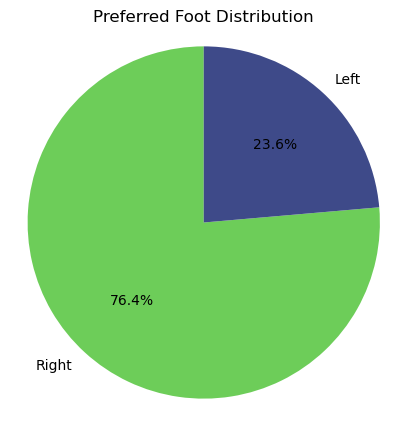

In [53]:
foot_counts = data_raw['preferred_foot'].value_counts()
plt.figure(figsize=(5, 5))
plt.pie(foot_counts, labels=foot_counts.index, autopct='%1.1f%%', startangle=90, colors = ['#6DCD59', '#3E4A89' ]  )
plt.title('Preferred Foot Distribution')
plt.axis('equal')
plt.show()

### Interpretation:
#### In the FIFA 20 dataset, 76.4% of players prefer using their right foot, while 23.6% prefer using their left foot. This indicates that right-footed players are more common at this level of football.
####

In [56]:
#checking for the unique values in the 'body_type' column
data_raw['body_type'].value_counts()

body_type
Normal                 10750
Lean                    6505
Stocky                  1016
Messi                      1
C. Ronaldo                 1
Neymar                     1
PLAYER_BODY_TYPE_25        1
Courtois                   1
Shaqiri                    1
Akinfenwa                  1
Name: count, dtype: int64

In [58]:
# Replacing the misentries by mode.
mode_body_type = data_raw['body_type'].mode()[0]
misentries = ['Messi', 'C. Ronaldo', 'Neymar', 'PLAYER_BODY_TYPE_25', 'Courtois', 'Shaqiri', 'Akinfenwa']
data_raw.loc[data_raw['body_type'].isin(misentries), 'body_type'] = mode_body_type
print(data_raw['body_type'].value_counts())

body_type
Normal    10757
Lean       6505
Stocky     1016
Name: count, dtype: int64


####
### Count Plot for the different features.

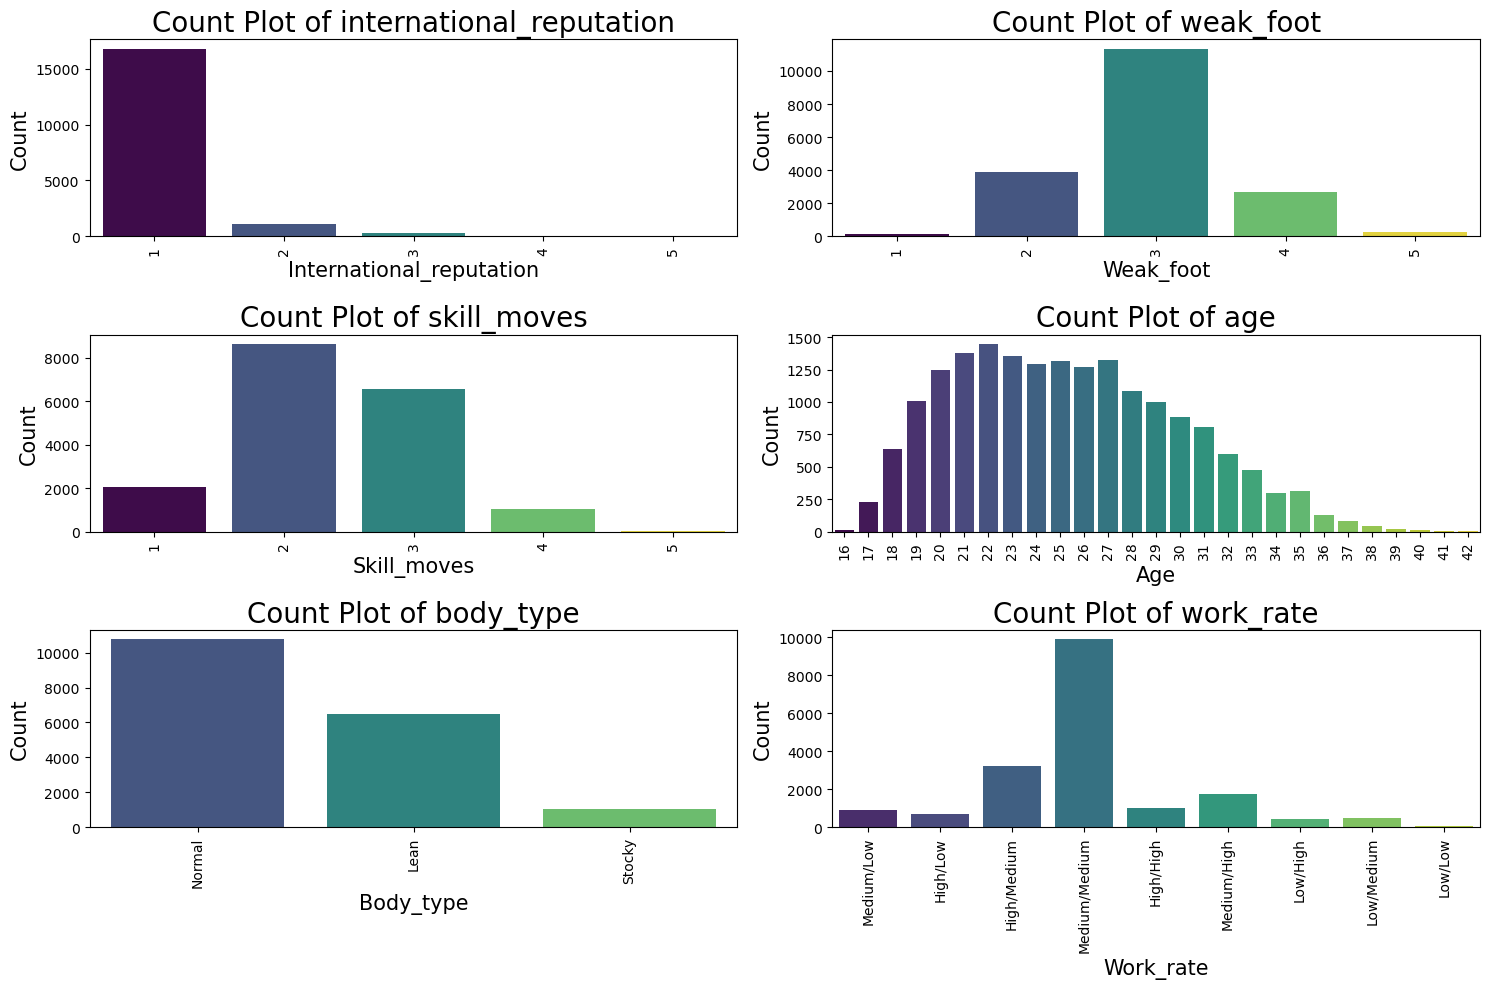

In [61]:
features = ['international_reputation', 'weak_foot', 'skill_moves', 'age', 'body_type', 'work_rate']
plt.figure(figsize = (15,10))
i = 1
for feature in features:
    plt.subplot(3, 2, i)
    sns.countplot(x = feature, data = data_raw,  hue = feature, palette = 'viridis', legend = False )
    plt.title(f'Count Plot of {feature}', fontsize = 20)
    plt.xlabel(feature.capitalize(), fontsize=15)
    plt.ylabel('Count', fontsize=15)
    plt.xticks(rotation=90)
    i=i+1
plt.tight_layout()
plt.show()

### Interpretation:
#### 1) It is observed that most of the players belong to the category of international reputation '1,' which means that most of the players are not very popular worldwide, and there are only a few players who are famous globally.
####
#### 2) It is observed that most players can use their weak foot adequately, while some players possess the skills to use their weak foot effectively.
####
#### 3) It is observed that most players have 2 to 3 skill moves, while some players have only one skill move, and a few players have 4 skill moves.
####
#### 4) It is observed that most of the players belong to the age group of 19 to 32 years, which means that this age range suggests the players are in their athletic prime, combining physical fitness, skill development, and performance maturity
####
#### 5) Most of the players have a lean to normal body type, while a few are stocky. This suggests that the team likely prioritizes agility and speed, but also values strength and physical presence from the stockier players.
####
#### 6) Most of the players have a medium work rate, while some have a medium to high work rate. This means that this indicates that while most players maintain a steady effort throughout matches, a few demonstrate a higher work rate. This variation can impact the team's overall energy and performance, enabling strategic plays where different players can take on more intensive roles as needed.
####

### Count Plot for Players Able to Play in Multiple Positions

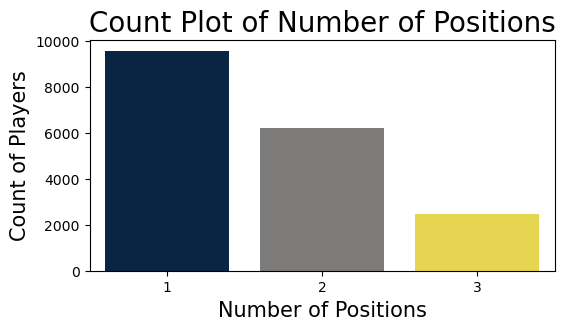

In [71]:
data_raw['num_positions'] = data_raw['player_positions'].str.split(',').apply(len)
plt.figure(figsize=(6, 3))
sns.countplot(x='num_positions', data=data_raw, hue = 'num_positions', palette = 'cividis', legend = False)
plt.title('Count Plot of Number of Positions', fontsize=20)
plt.xlabel('Number of Positions', fontsize=15)
plt.ylabel('Count of Players', fontsize=15)
plt.show()

### Interpretation: 
#### Most players have their dedicated positions, so they can only play in fixed positions. However, some players can play in up to two positions, and a few players are versatile, meaning they can play in three different positions.

#####
### Rank-Ordered List of Top 10 Countries with Most Players

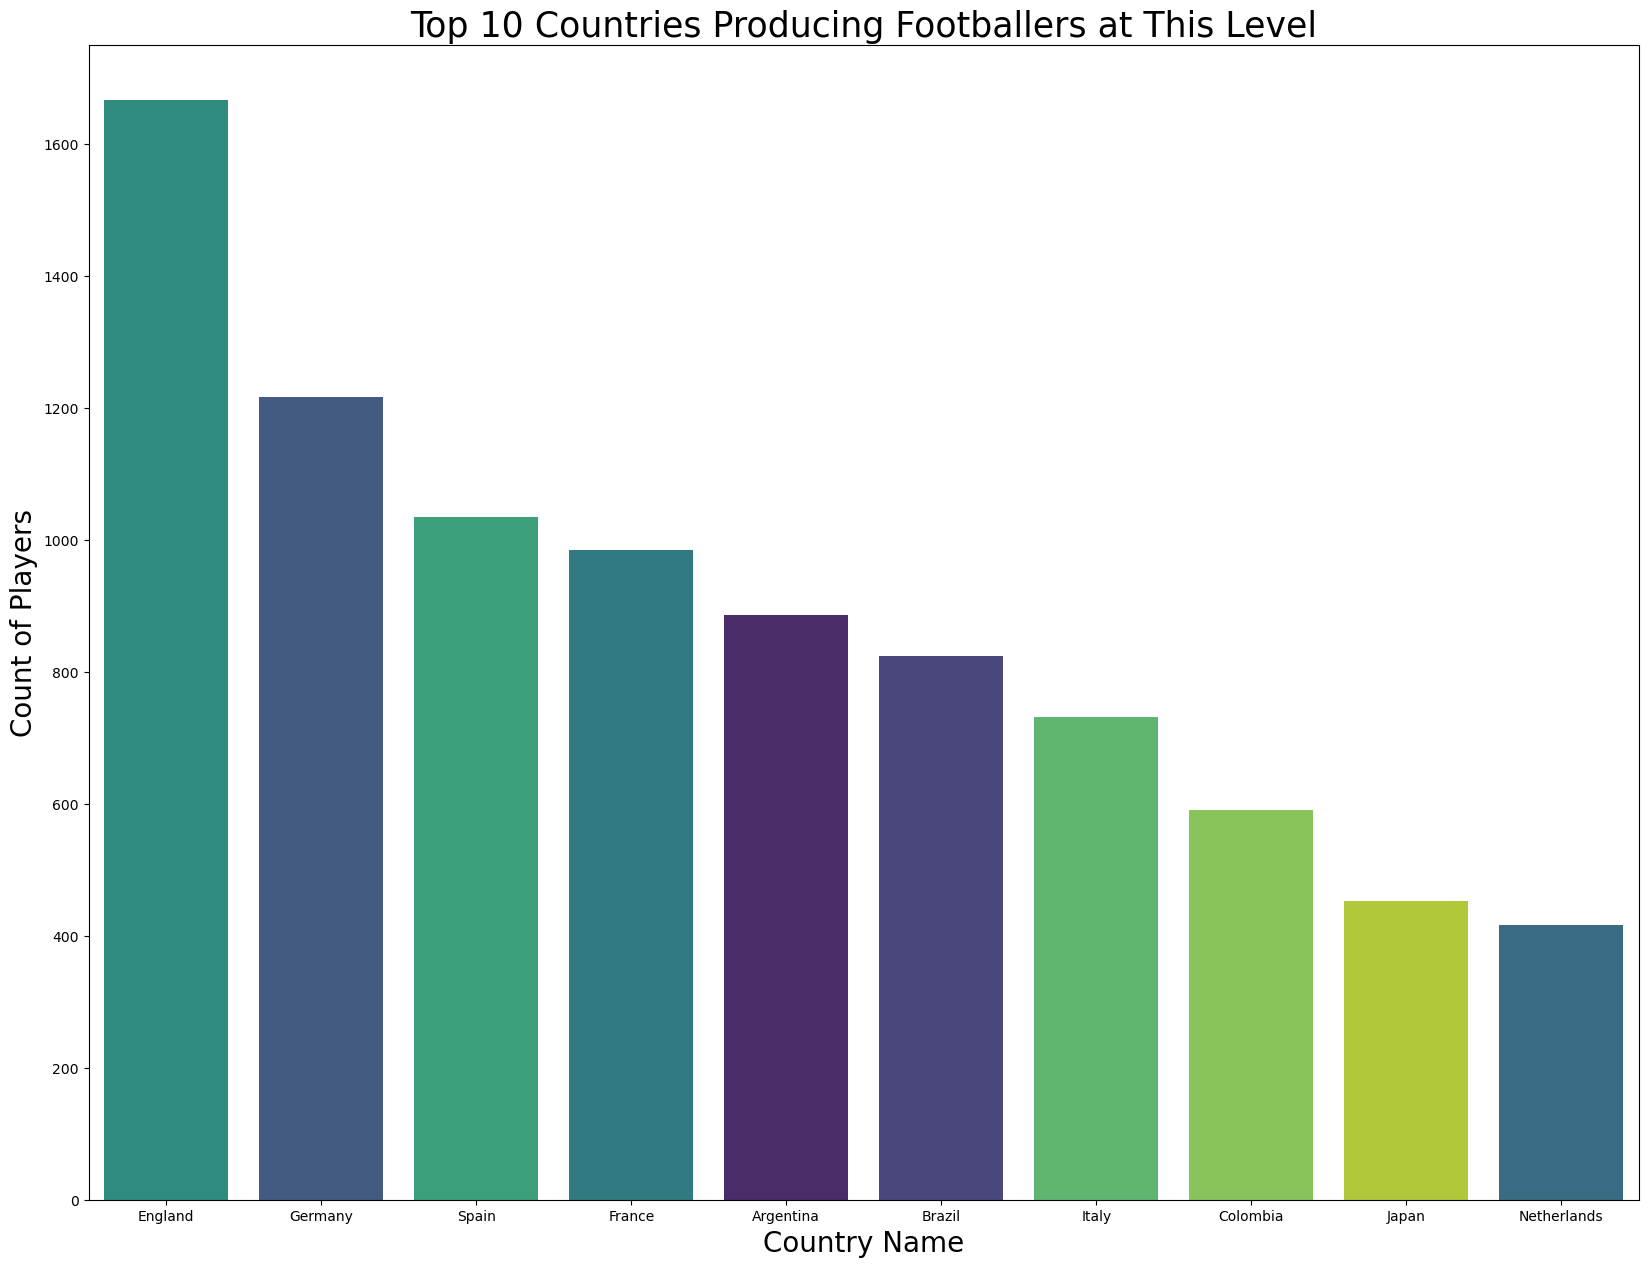

In [75]:
# Grouping by nationality and count the number of players
country_counts = data_raw['nationality'].value_counts()
# Selecting the top 10 countries
top_10_countries = country_counts.head(10).index
# Filtering the data for top 10 countries
data_nationality = data_raw[data_raw['nationality'].isin(top_10_countries)]
# Count plot for top 10 countries
plt.figure(figsize=(20,15))
sns.countplot(x='nationality', data=data_nationality, hue ='nationality', palette='viridis', order=top_10_countries)
plt.title('Top 10 Countries Producing Footballers at This Level', fontsize=25)
plt.xlabel('Country Name', fontsize=20)
plt.ylabel('Count of Players', fontsize=20)
plt.show()

### Interpretation: 
#### These are the top 10 countries that produce the most football players who are able to play at high levels, such as in FIFA tournaments. 

## ii) Bivariate Analysis

### Checking Relationship between some variables.

In [79]:
def plot_relationship(data_raw, x, y, color='darkred', marker='o'):
    title = f'Relationship between {x.capitalize()} and {y.capitalize()}'
    plt.figure(figsize=(20, 10))
    sns.lineplot(x=x, y=y, data=data_raw, color=color, marker=marker)
    plt.title(title, fontsize=25)
    plt.xlabel(x.capitalize(), fontsize=20)
    plt.ylabel(y.capitalize(), fontsize=20)
    plt.show()

#### 1) Relationship between age and physic.

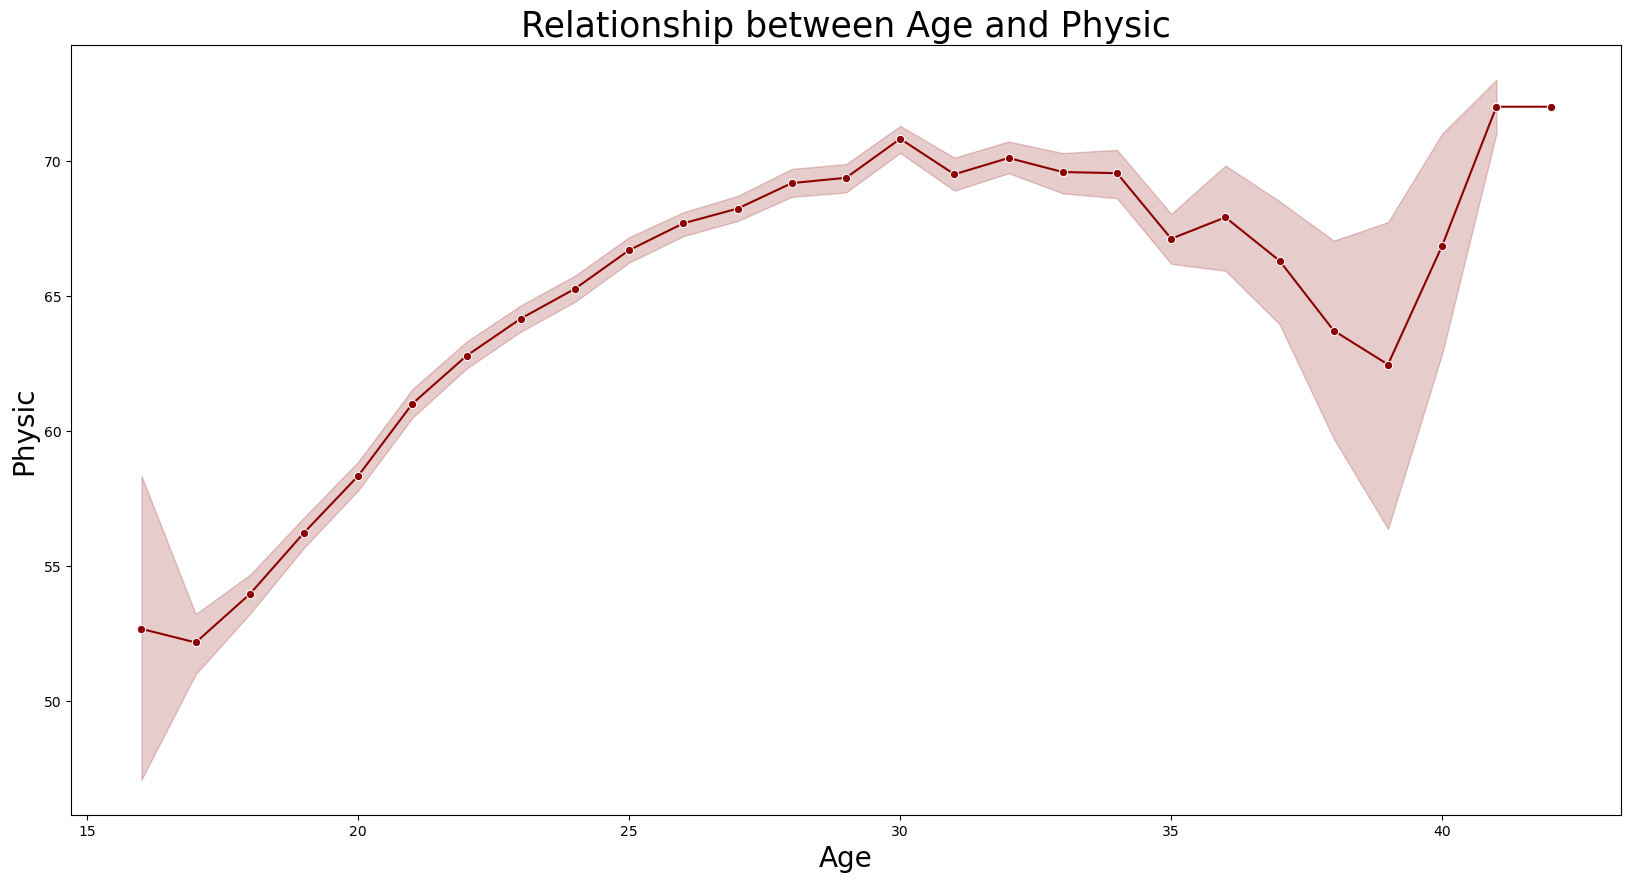

In [85]:
plot_relationship(data_raw, 'age', 'physic')

### Interpretation:
#### It is observed that the physical rating of players is at its peak between the ages of 20 and 35, which means that players in this age range are likely to perform at their best. This period is crucial for clubs to maximize the potential of their players and achieve the best results on the field. Additionally, it highlights the importance of maintaining physical fitness and training to sustain peak performance throughout these years.

#### 2) Relationship between Height and Weight

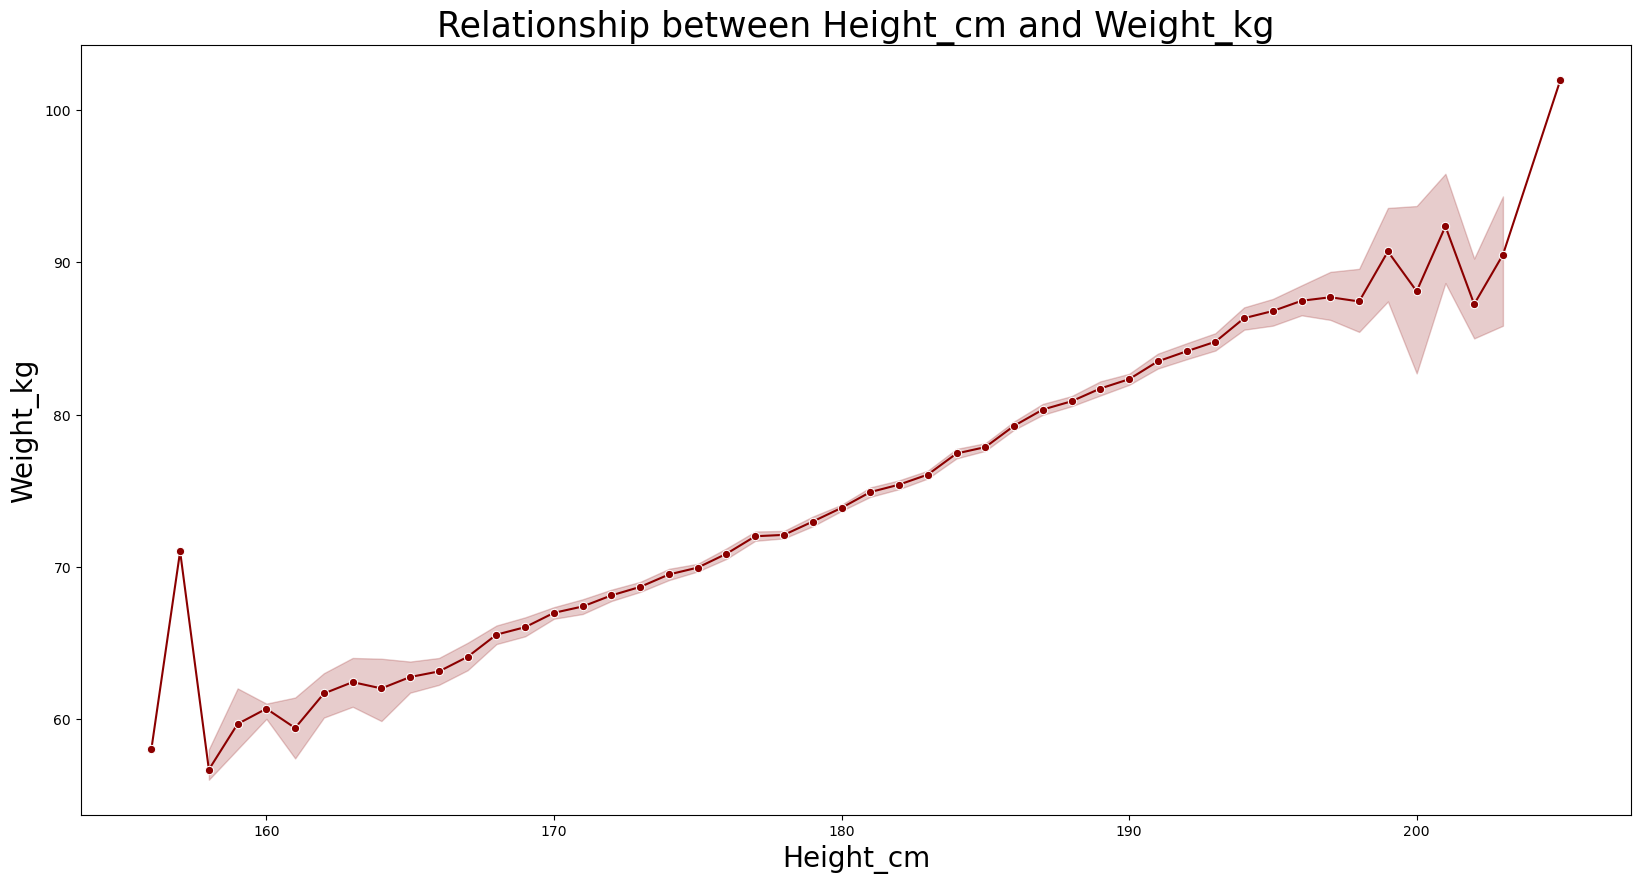

In [89]:
plot_relationship(data_raw, 'height_cm', 'weight_kg')

### Interpretation:
#### It is observed that as height increases, weight also increases, which is a standard relation.
####

#### 3) Relationship between Weight and Overall

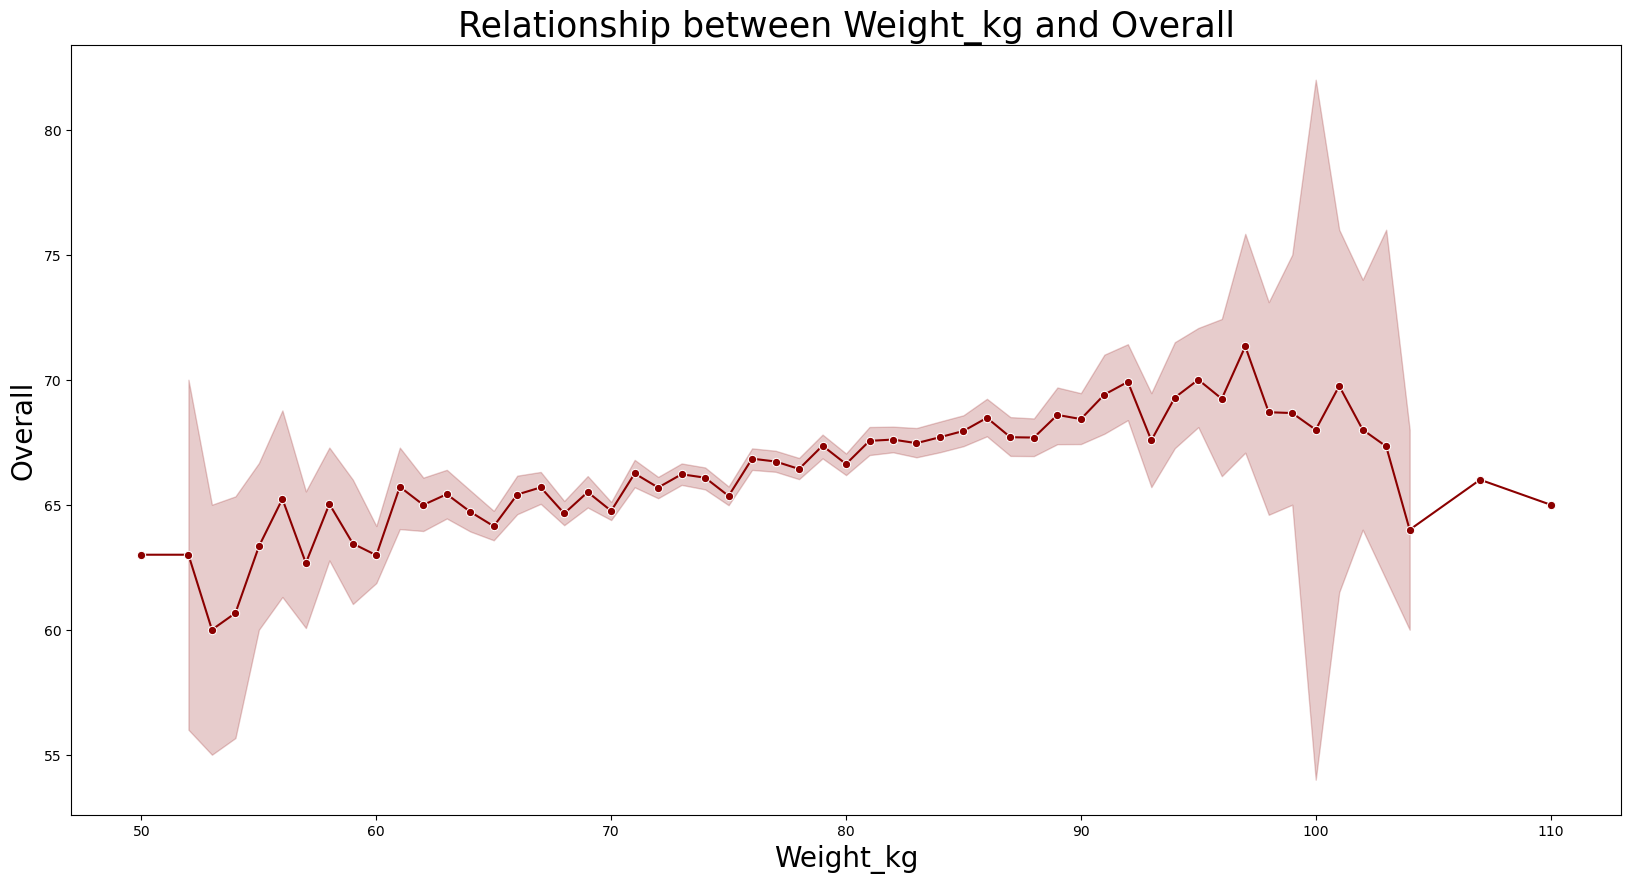

In [93]:
plot_relationship(data_raw, 'weight_kg', 'overall')

### Interpretation:
#### It is observed that weight does not significantly impact the player's overall performance.
####

#### 4) Relationship between Height and Overall

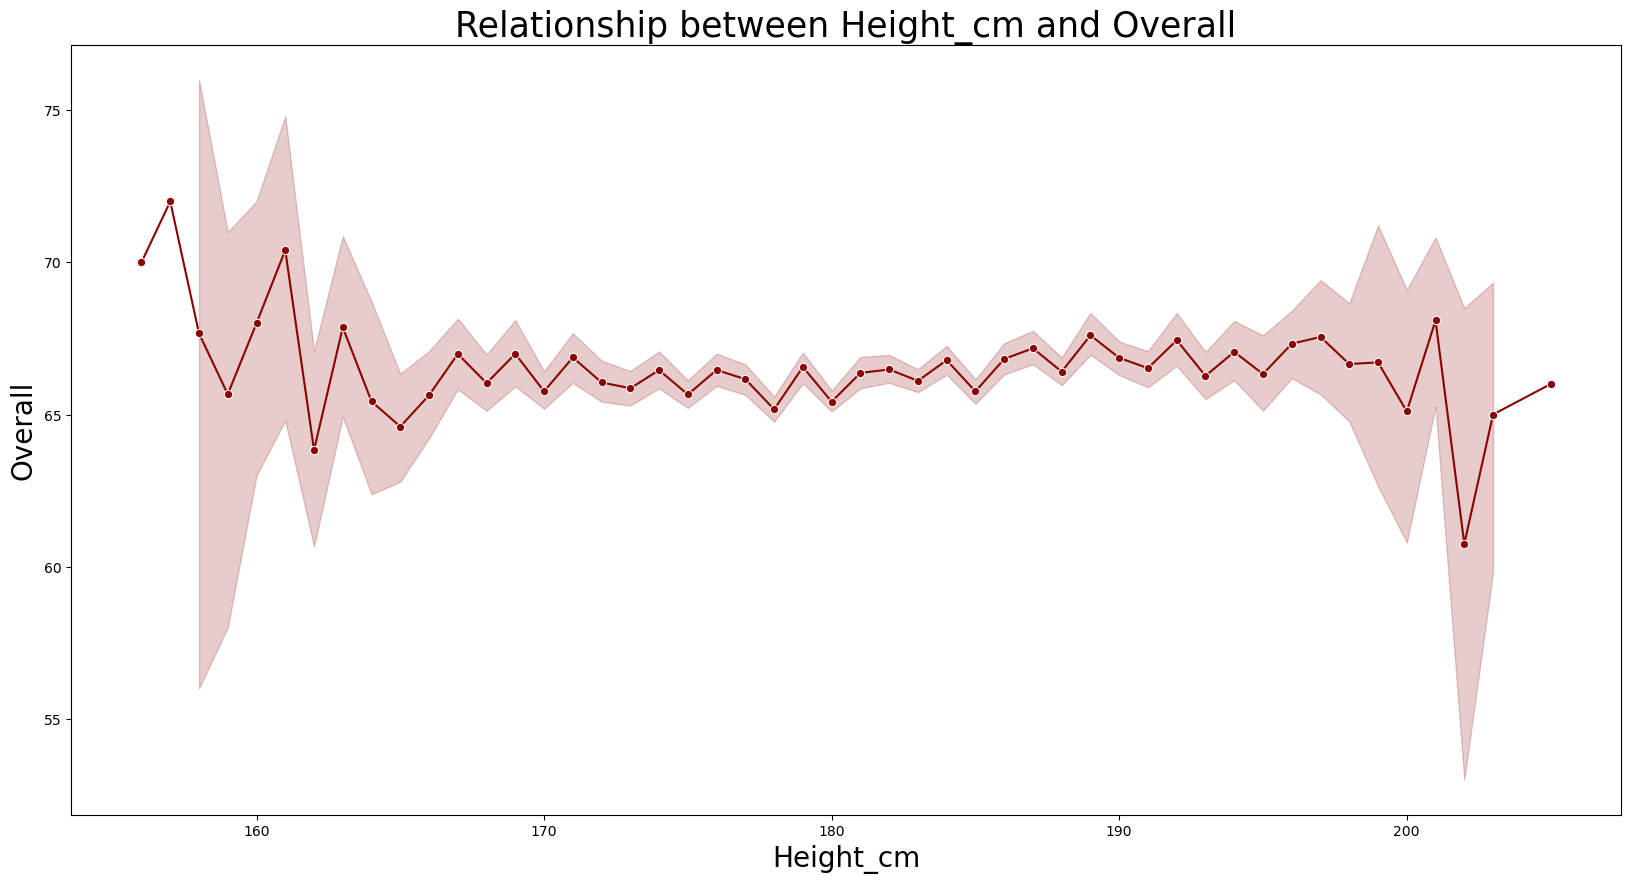

In [97]:
plot_relationship(data_raw, 'height_cm', 'overall')

### Interpretation:
#### It is observed that Height does not significantly impact the player's overall performance.
####

#### 5) Relationship between Overall and Value_eur

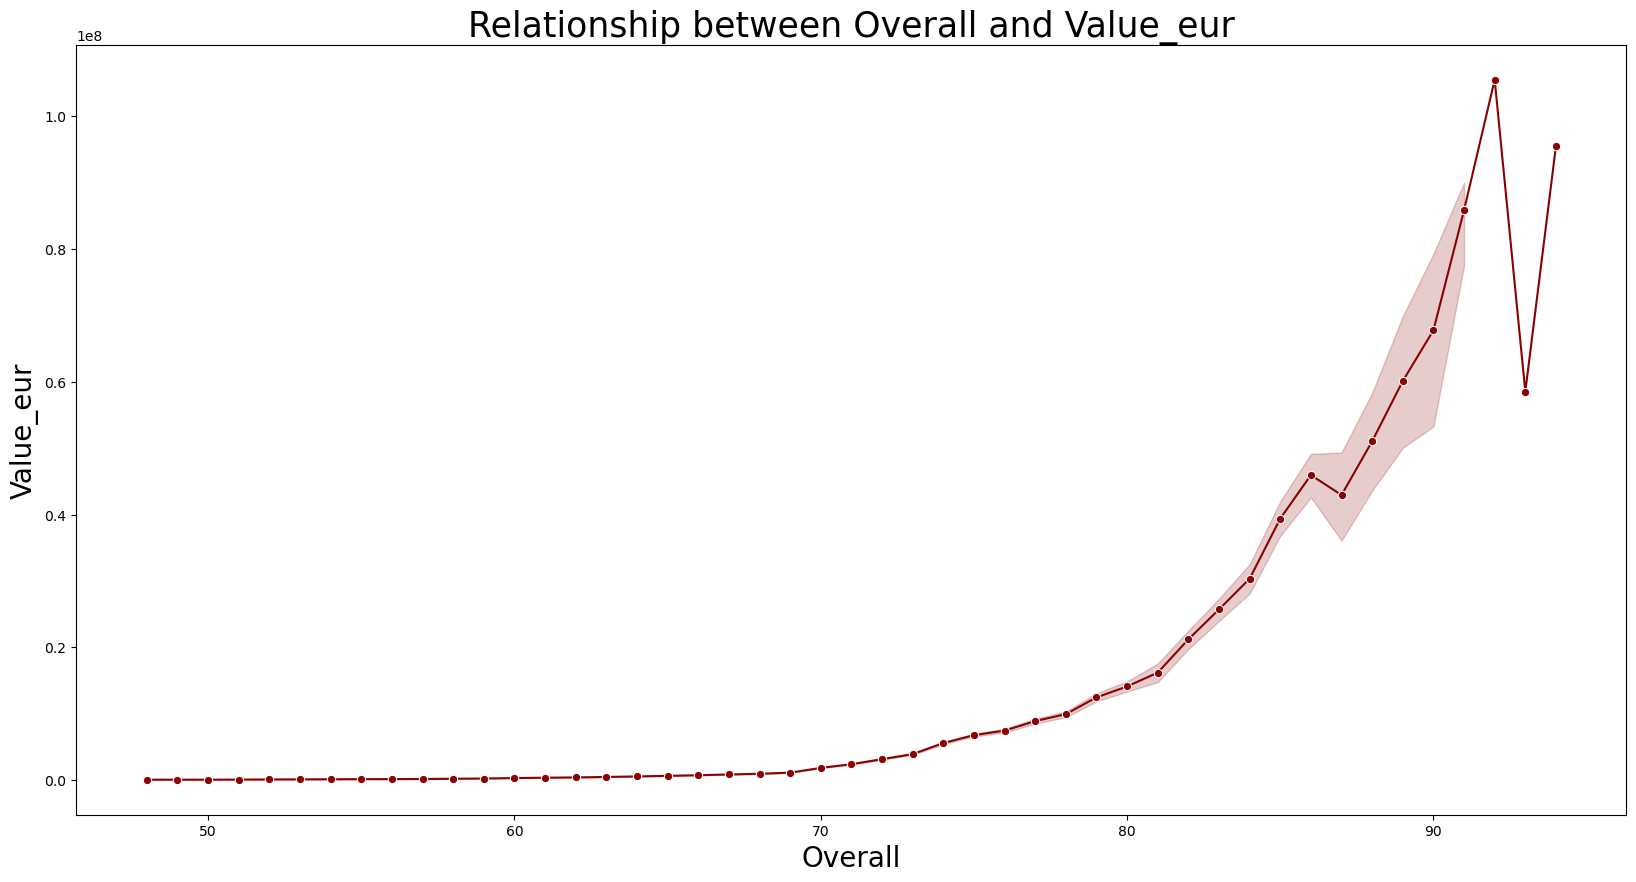

In [101]:
plot_relationship(data_raw, 'overall', 'value_eur')

### Interpretation:
#### It is observed that as the overall performance of the player increases, the chance of that player getting more paid increases. This means the quality of players matters.

#### 6) Relationship between Overall and wage_eur

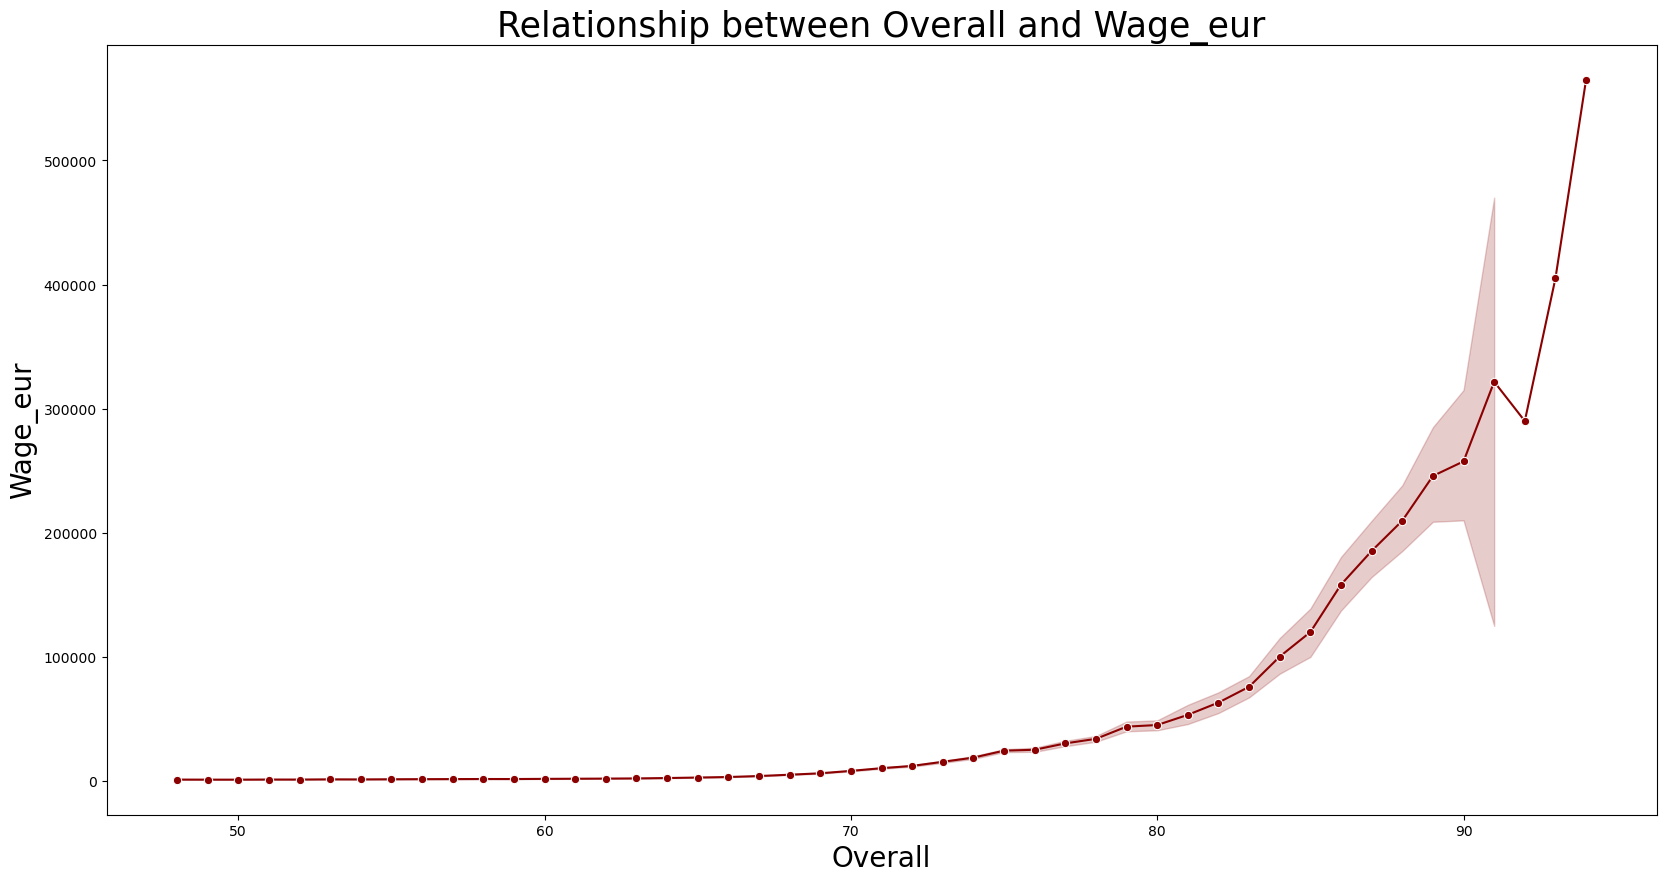

In [105]:
plot_relationship(data_raw, 'overall', 'wage_eur')

### Interpretation:
#### It is observed that as the overall performance of the player increases, the weekly value received by the players from the club increases.
####

#### 7) Relationship between international_reputation and physic

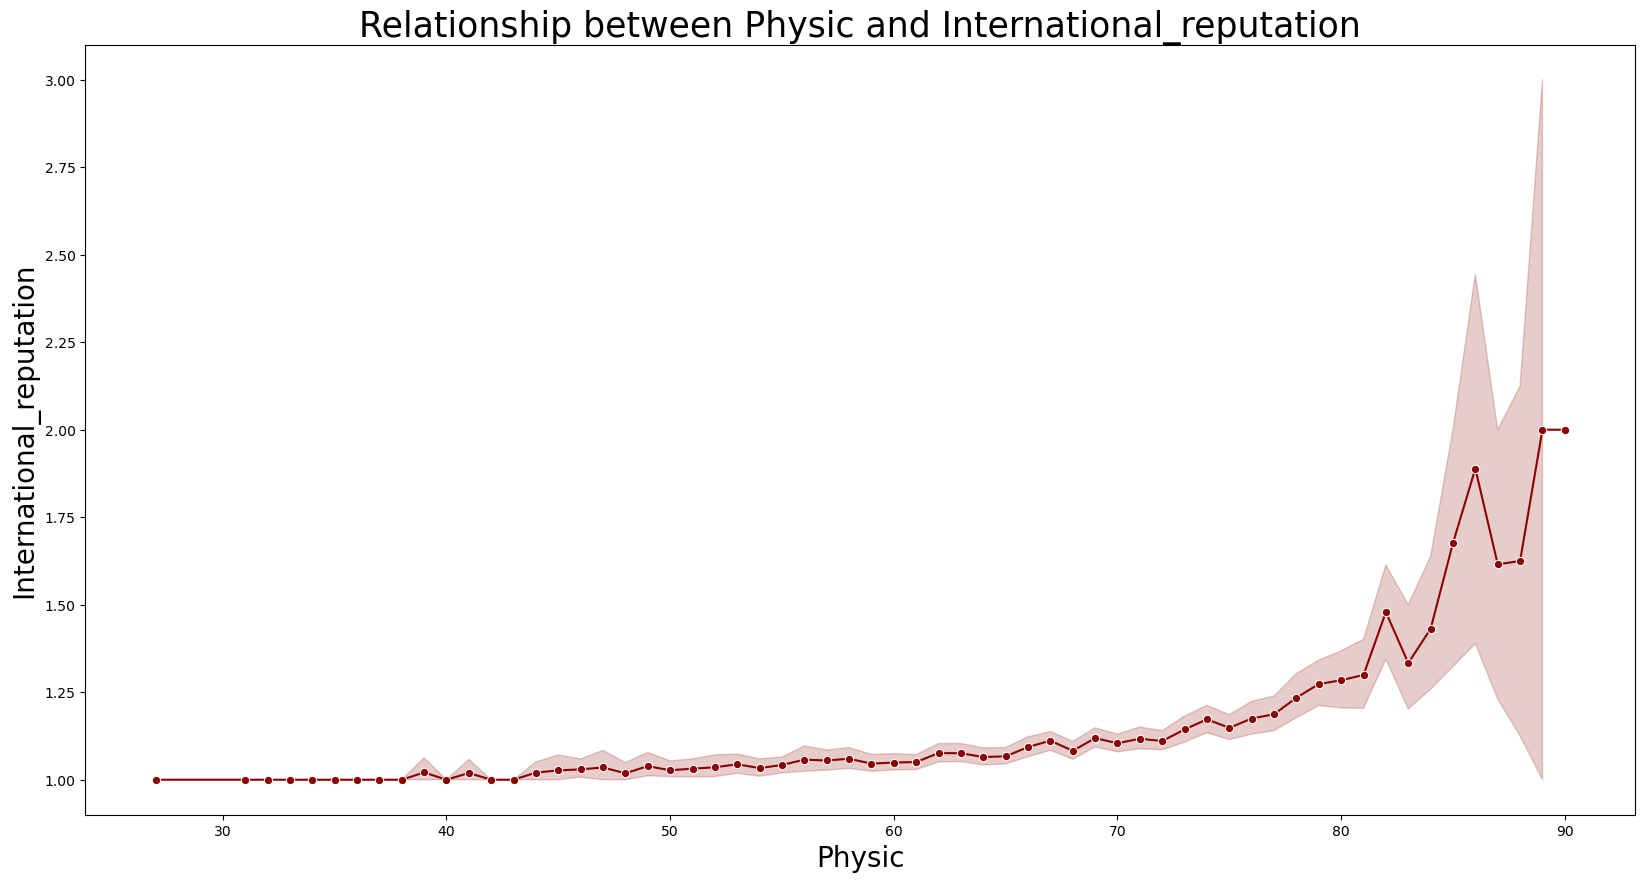

In [109]:
plot_relationship(data_raw, 'physic', 'international_reputation')

### Interpretation:
#### It is observed that players with better physical scores are more popular globally.
####